In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

class MyColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.pipeline = ColumnTransformer([
            ("income", StandardScaler(), ["Income", "Age"])
        ], remainder="passthrough")
    
    def fit(self, X, y=None):
        self.pipeline.fit(self.first_preprocess(X))
        return self

    def transform(self, X):
        return self.pipeline.transform(self.first_preprocess(X))

    def fit_transform(self, X, y=None):
        return self.pipeline.fit_transform(self.first_preprocess(X))

    def first_preprocess(self, df):
        df = df.copy()
        
        df.drop("Name", axis=1, inplace=True)

        df["Marital Status"] = np.where(
            df["Marital Status"] == "Divorced", 0,
            np.where(df["Marital Status"] == "Married", 1, 
                     np.where(df["Marital Status"] == "Single", 2, 3)
                    )
        )

        df["Education Level"] = np.where(
            df["Education Level"] == "High School", 0,
            np.where(df["Education Level"] == "Associate Degree", 1,  
                     np.where(df["Education Level"] == "Bachelor's Degree", 2,
                              np.where(df["Education Level"] == "Master's Degree", 3,
                                       4)
                             )
                    )
        )

        df["Smoking Status"] = np.where(
            df["Smoking Status"] == "Non-smoker", 0,
            np.where(df["Smoking Status"] == "Former", 1, 2)
        )

        df["Physical Activity Level"] = np.where(
            df["Physical Activity Level"] == "Sedentary", 0,
            np.where(df["Physical Activity Level"] == "Moderate", 1, 2)
        )

        df["Employed"] = (df["Employment Status"] == "Employed").astype(np.int8)
        df.drop("Employment Status", axis=1, inplace=True)

        df["Alcohol Consumption"] = np.where(
            df["Alcohol Consumption"] == "Low", 0,
            np.where(df["Alcohol Consumption"] == "Moderate", 1, 2)
        )

        df["Dietary Habits"] = np.where(
            df["Dietary Habits"] == "Unhealthy", 0,
            np.where(df["Dietary Habits"] == "Moderate", 1, 2)
        )

        df["Sleep Patterns"] = np.where(
            df["Sleep Patterns"] == "Poor", 0,
            np.where(df["Sleep Patterns"] == "Fair", 1, 2)
        )

        df["Income_log"] = np.log(df["Income"])  

        for colname in ["History of Mental Illness", "History of Substance Abuse", 
                        "Family History of Depression", "Chronic Medical Conditions"]:
            df[colname] = (df[colname] == "Yes").astype(np.int8)

        return df


In [3]:
mct = MyColumnTransformer()

In [4]:
data = pd.read_csv("depression_data.csv")

In [5]:
data.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [6]:
data.shape

(413768, 16)

In [13]:
data_transformed = mct.first_preprocess(data)

In [14]:
data_transformed.shape

(413768, 16)

In [15]:
data_transformed.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Employed,Income_log
0,31,1,2,2,0,2,26265.67,1,1,1,1,0,1,1,0,10.176018
1,55,1,0,1,0,0,42710.36,2,0,1,1,0,0,1,1,10.662197
2,78,3,3,1,0,0,125332.79,0,0,2,0,0,1,0,1,11.738728
3,58,0,3,3,0,1,9992.78,1,1,0,0,0,0,0,0,9.209618
4,18,2,0,0,0,0,8595.08,0,1,1,1,0,1,1,0,9.058945


<Axes: >

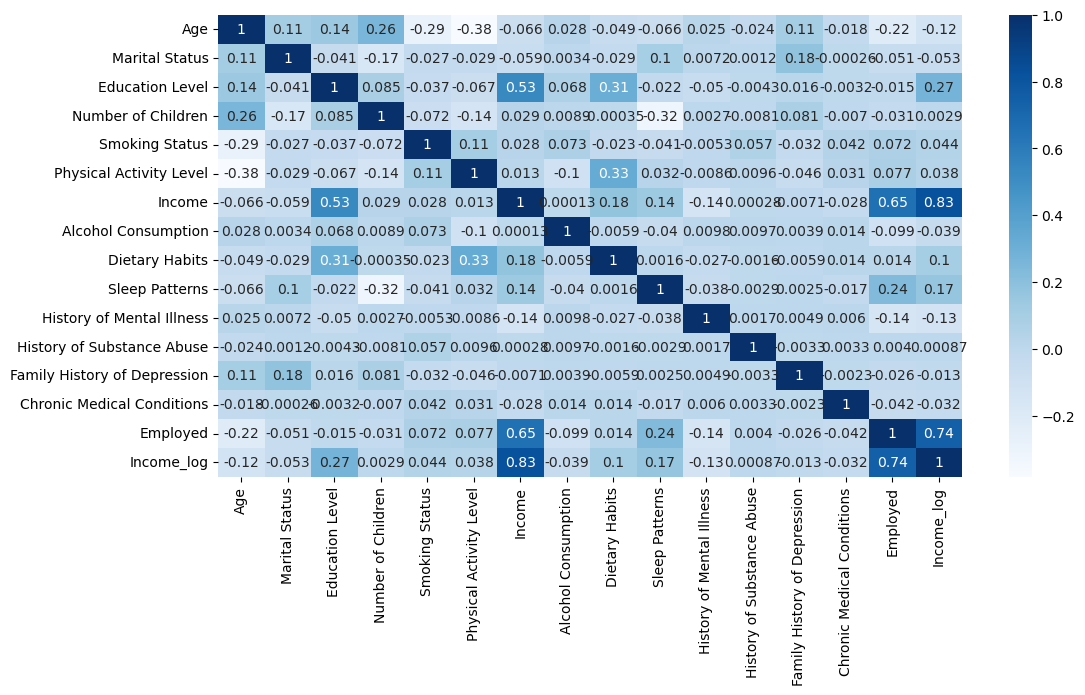

In [22]:
sns.heatmap(data_transformed.corr(), cmap="Blues", annot=True)

In [43]:
pd.DataFrame(data_transformed.var())

,0
Age,3.297405e+02
Marital Status,7.337871e-01
Education Level,1.424156e+00
Number of Children,1.530303e+00
Smoking Status,4.919522e-01
Physical Activity Level,5.620796e-01
Income,1.650318e+09
Alcohol Consumption,5.723184e-01
Dietary Habits,5.316105e-01
Sleep Patterns,5.140045e-01


In [24]:
y = data_transformed['Chronic Medical Conditions']
X = data_transformed.drop(columns='Chronic Medical Conditions')

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

f_scores = selector.scores_
p_values = selector.pvalues_

results_df = pd.DataFrame({
    'Feature': X.columns,
    'F-statistic': f_scores,
    'p-value': p_values
}).sort_values(by='F-statistic', ascending=False)
results_df

,Feature,F-statistic,p-value
13,Employed,745.660681,4.932236e-164
4,Smoking Status,718.349540,4.179996e-158
14,Income_log,424.706975,2.573074e-94
5,Physical Activity Level,391.032826,5.411695e-87
6,Income,334.627316,1.010450e-74
0,Age,128.576532,8.480278e-30
9,Sleep Patterns,119.861078,6.845098e-28
8,Dietary Habits,86.285867,1.564356e-20
7,Alcohol Consumption,82.252220,1.202855e-19
3,Number of Children,20.260173,6.761146e-06


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [45]:
importance_df

,Feature,Importance
14,Income_log,0.256016
6,Income,0.255612
0,Age,0.188838
3,Number of Children,0.046342
2,Education Level,0.037957
7,Alcohol Consumption,0.029691
9,Sleep Patterns,0.026682
8,Dietary Habits,0.025346
1,Marital Status,0.024818
5,Physical Activity Level,0.023591
